# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [599]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [600]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [601]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [602]:
df = pd.read_csv('Space_Missions_Analysis.csv')

# Preliminary Data Exploration

* What is the shape of `df`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [603]:
df.shape

(4324, 9)

In [604]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [605]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [606]:
df.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [607]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [609]:
df.Price = df.Price.replace('$', '').str.replace(',', '').astype(float)
#df['Date'] = pd.to_datetime(df['Date'])
#df.Price.fillna(np.mean(df.Price), inplace=True)
df.dropna(inplace=True)

In [610]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    964 non-null    int64  
 1   Unnamed: 0      964 non-null    int64  
 2   Organisation    964 non-null    object 
 3   Location        964 non-null    object 
 4   Date            964 non-null    object 
 5   Detail          964 non-null    object 
 6   Rocket_Status   964 non-null    object 
 7   Price           964 non-null    float64
 8   Mission_Status  964 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 75.3+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

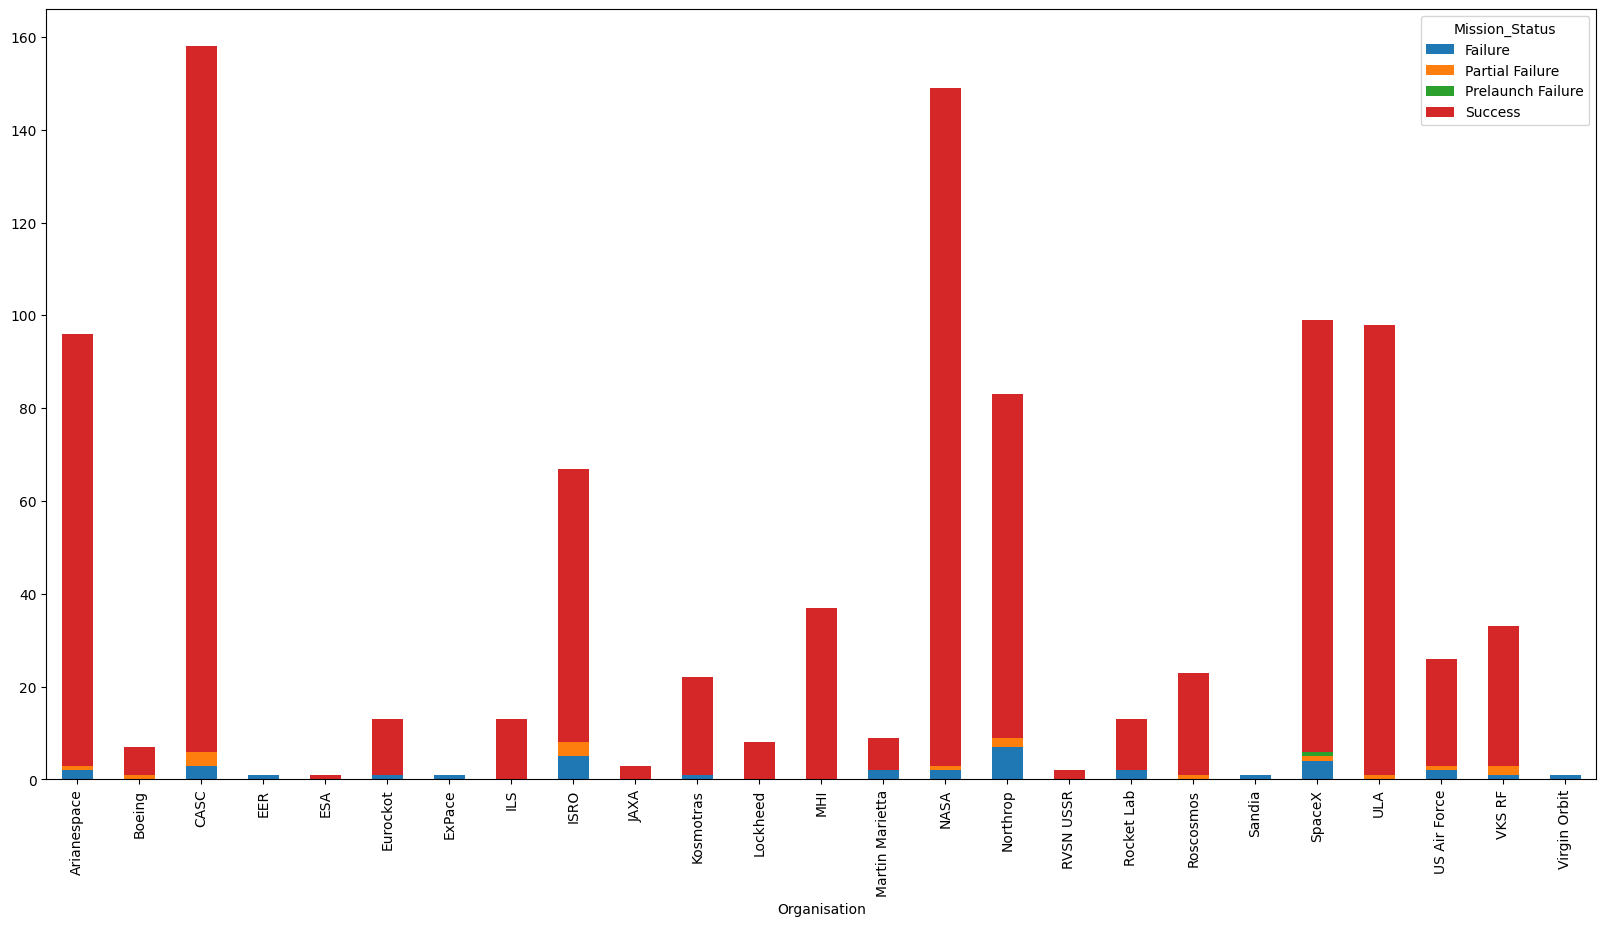

In [611]:
df.groupby('Organisation')['Mission_Status'].value_counts()

plot = df.groupby('Organisation')['Mission_Status'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [612]:
df.Rocket_Status.value_counts()

StatusActive     586
StatusRetired    378
Name: Rocket_Status, dtype: int64

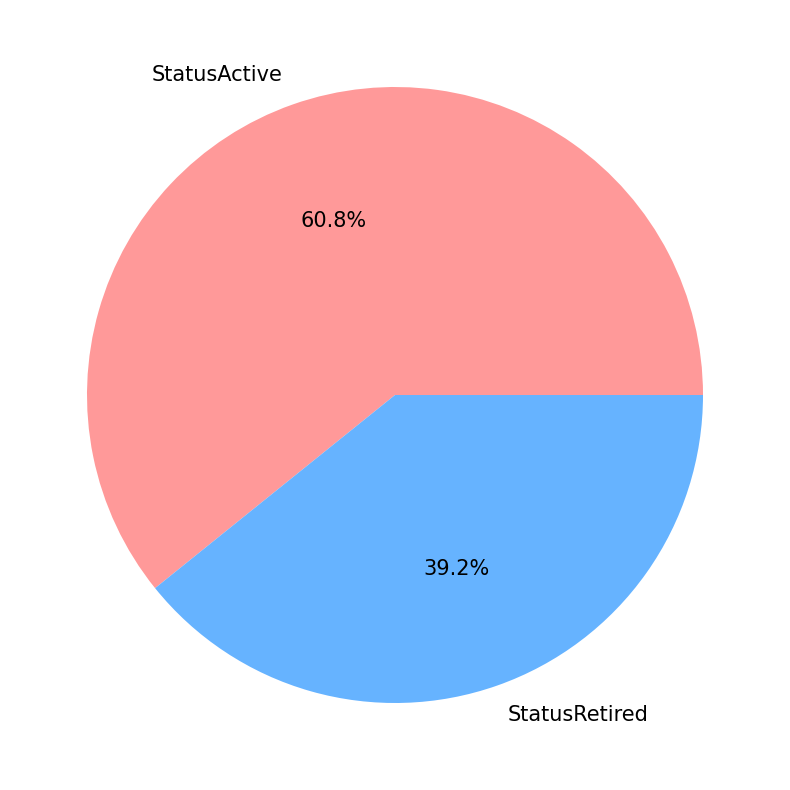

In [613]:
pie = df.Rocket_Status.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), 
                                           fontsize=15, colors=['#ff9999','#66b3ff'],
                                           xlabel='Rocket Status', ylabel='')

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

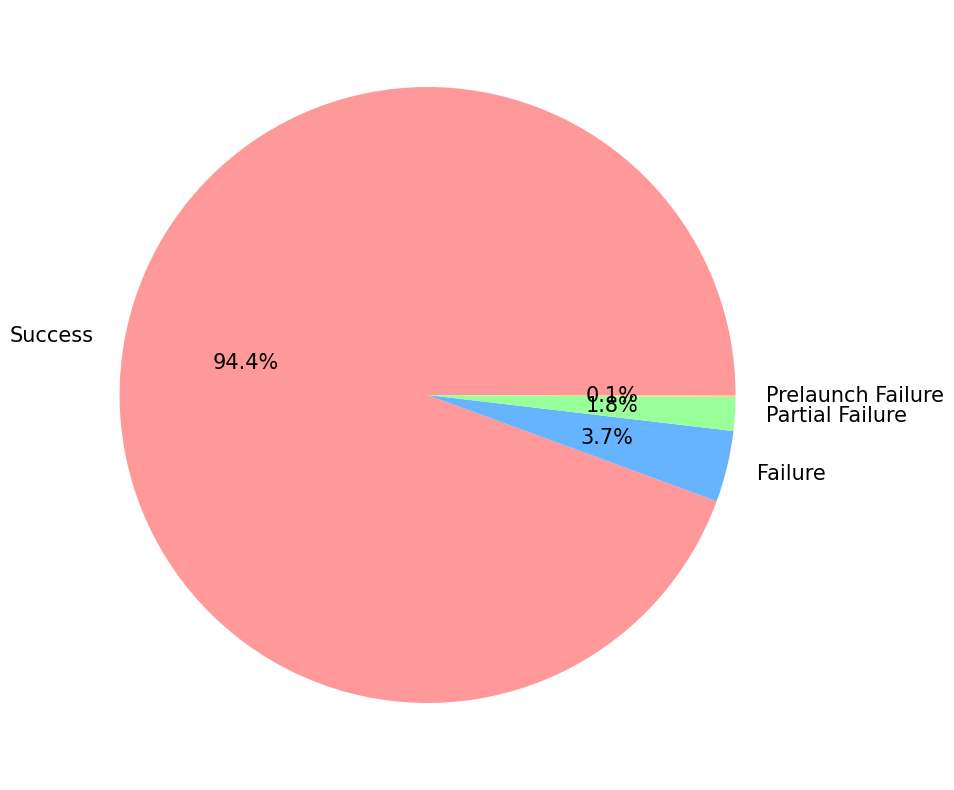

In [614]:
pie = df.Mission_Status.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10),
                                             fontsize=15, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
                                                xlabel='Mission Status', ylabel='') 

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

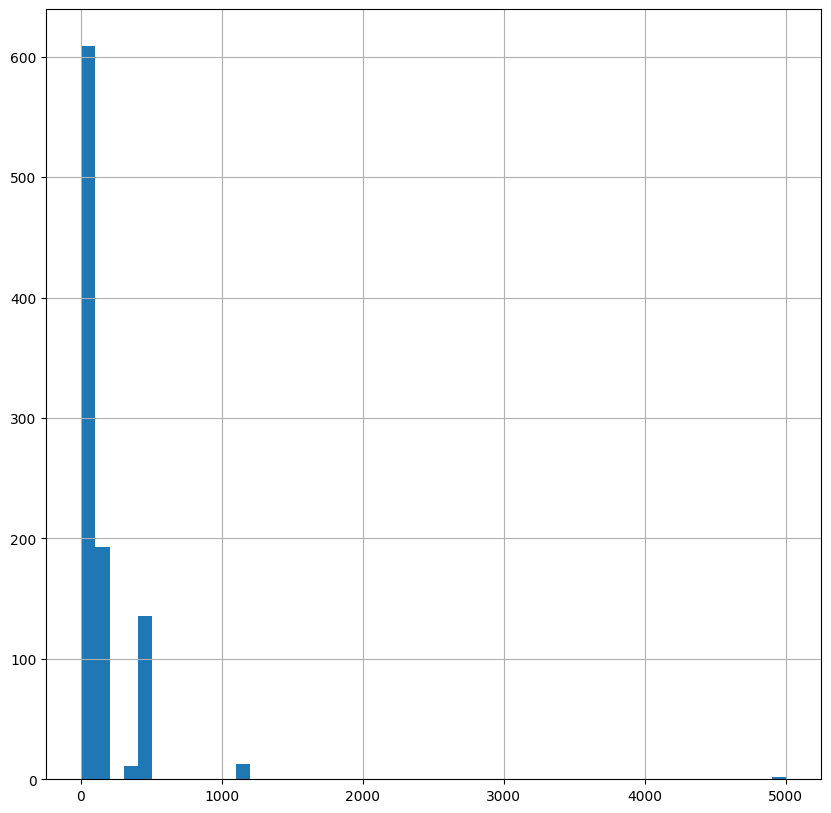

In [615]:
hist = df.Price.hist(bins=50, figsize=(10, 10))

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [616]:
df["Country"] = df["Location"].apply(lambda x: x.split(",")[-1].strip())
#change the names of countries via dictionary
my_dict = {'Russia':'Russian Federation', 'New Mexico': 'USA', 'Yellow Sea': 'China',
           'Shahrud Missile Test Site':'Iran',
             'Pacific Missile Range Facility': 'USA',
             'Barents Sea':'Russian Federation', 'Gran Canaria': 'USA'}


df['Country'] = df['Country'].replace(my_dict)
df.Country.value_counts()

USA                   490
China                 159
France                 95
India                  67
Russian Federation     54
Kazakhstan             46
Japan                  40
New Zealand            13
Name: Country, dtype: int64

In [617]:

#convert to Alpha3 format via iso 3166
df.Country = df.Country.apply(lambda x: countries.get(x).alpha3)
df.Country.value_counts()

USA    490
CHN    159
FRA     95
IND     67
RUS     54
KAZ     46
JPN     40
NZL     13
Name: Country, dtype: int64

In [618]:
#mission count by country
count = df.Country.value_counts().reset_index()
fig = px.choropleth(count, locations="index", color="Country", hover_name="index",
                    color_continuous_scale=px.colors.sequential.matter,)

fig.update_layout(
    title_text = 'Mission Count by Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ))
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [619]:
#number of failures by country
fail = df[df.Mission_Status == 'Failure']
fail.Country.value_counts().reset_index()

fig = px.choropleth(fail.Country.value_counts().reset_index(), locations="index",
                    color="Country", hover_name="index",
                    color_continuous_scale=px.colors.sequential.matter)
fig.update_layout(
    title_text = 'Failure Count by Country',    
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ))
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [620]:
fig = px.sunburst(df, path=['Country', 'Organisation','Mission_Status'])
fig.update_layout(
    title_text = 'Mission Status by Country and Organisation',
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()


# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [621]:
#Total amount of money spent by organisation on missions
org_price = df.groupby('Organisation')['Price'].sum().sort_values(ascending=False).reset_index()
org_price

,Organisation,Price
0,NASA,"76,280.00"
1,Arianespace,"16,345.00"
2,ULA,"14,798.00"
3,RVSN USSR,"10,000.00"
4,CASC,"6,340.26"
5,SpaceX,"5,444.00"
6,Northrop,"3,930.00"
7,MHI,"3,532.50"
8,ISRO,"2,177.00"
9,US Air Force,"1,550.92"


In [622]:
fig = px.pie(org_price, values='Price', names='Organisation', title='Total Amount of Money Spent by Organisation on Missions')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    title_text = 'Total Amount of Money Spent by Organisation on Missions',
    margin = dict(t=50, l=25, r=25, b=25))

fig.show()


# Analyse the Amount of Money Spent by Organisation per Launch

In [623]:
amount_of_money_po = df.groupby('Organisation')['Price'].sum().sort_values(ascending=False).reset_index()
mission_count_po = df.groupby('Organisation')['Mission_Status'].count().sort_values(ascending=False).reset_index()

In [624]:
new_df = pd.merge(amount_of_money_po, mission_count_po, on='Organisation')
new_df["Price_per_Mission"] = new_df["Price"]/new_df["Mission_Status"]

In [625]:
new_df

,Organisation,Price,Mission_Status,Price_per_Mission
0,NASA,"76,280.00",149,511.95
1,Arianespace,"16,345.00",96,170.26
2,ULA,"14,798.00",98,151.00
3,RVSN USSR,"10,000.00",2,"5,000.00"
4,CASC,"6,340.26",158,40.13
5,SpaceX,"5,444.00",99,54.99
6,Northrop,"3,930.00",83,47.35
7,MHI,"3,532.50",37,95.47
8,ISRO,"2,177.00",67,32.49
9,US Air Force,"1,550.92",26,59.65


# Chart the Number of Launches per Year

In [626]:
#df["Date"].apply(lambda x: datetime.strptime(x, "%b %d,%y %H:%M:%S %p"))
#delete UTC
df["Year"] = df["Date"].apply(lambda x: x.split("UTC")[0])
#delete the day at the beginning
df["Year"] = df["Year"].apply(lambda x: x.split(" ")[3])



<AxesSubplot: xlabel='Year'>

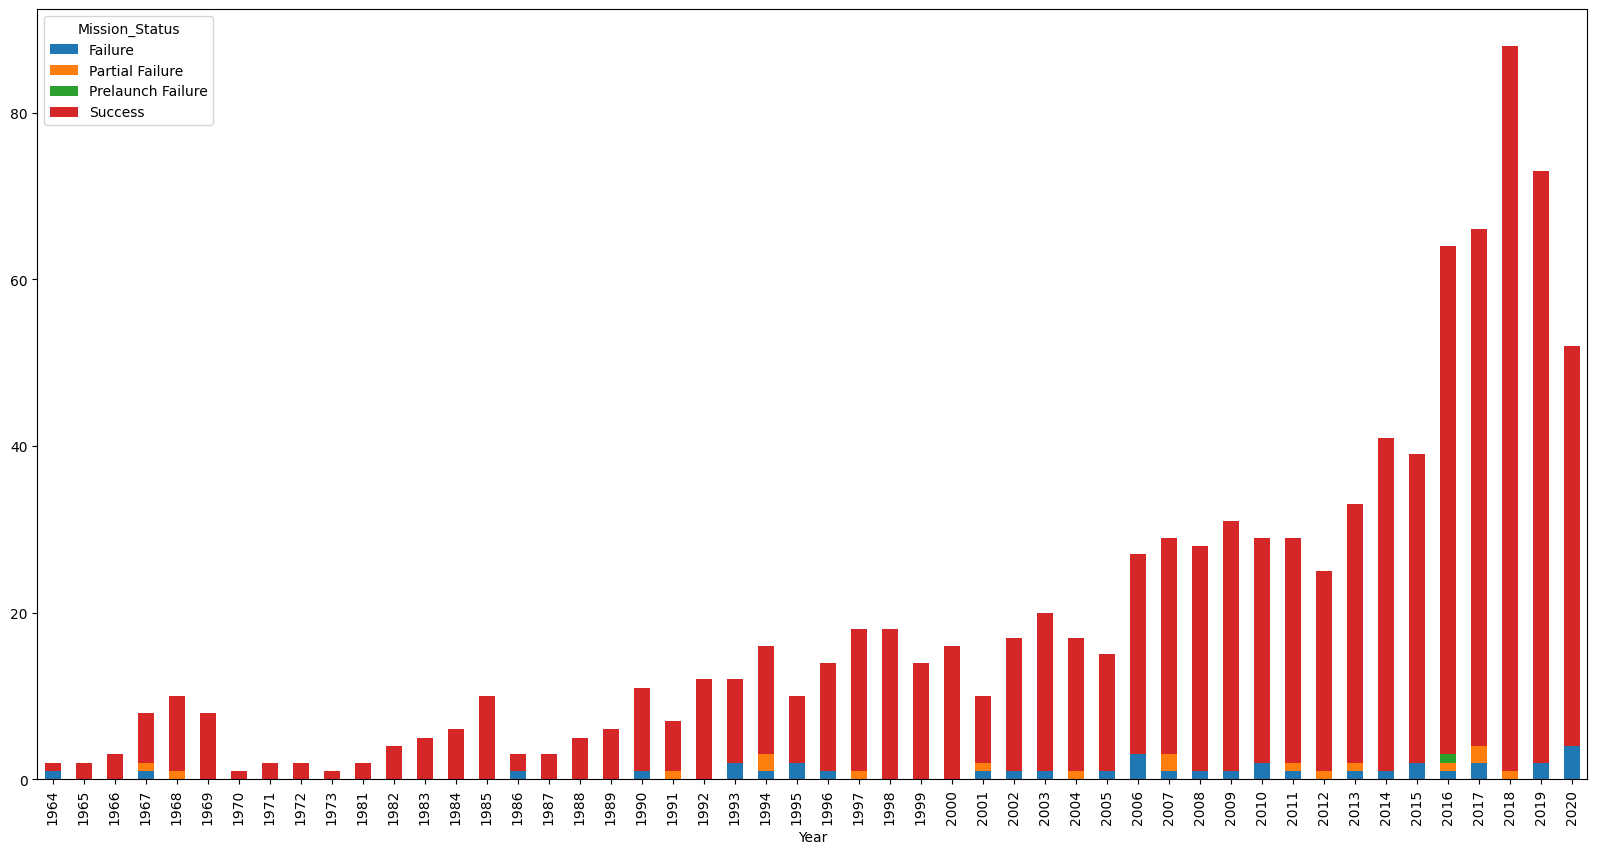

In [627]:
df.groupby('Year')['Mission_Status'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [628]:
df

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,2020
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,2020
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,CHN,2020
...,...,...,...,...,...,...,...,...,...,...,...
3855,3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.00,Success,USA,1966
3971,3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA,1965
3993,3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success,USA,1965
4000,4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA,1964


In [629]:
df["Month"] = df["Date"].apply(lambda x: x.split("UTC")[0])
#delete the day at the beginning
df["Month"] = df["Month"].apply(lambda x: x.split(" ")[1])

<AxesSubplot: xlabel='Month'>

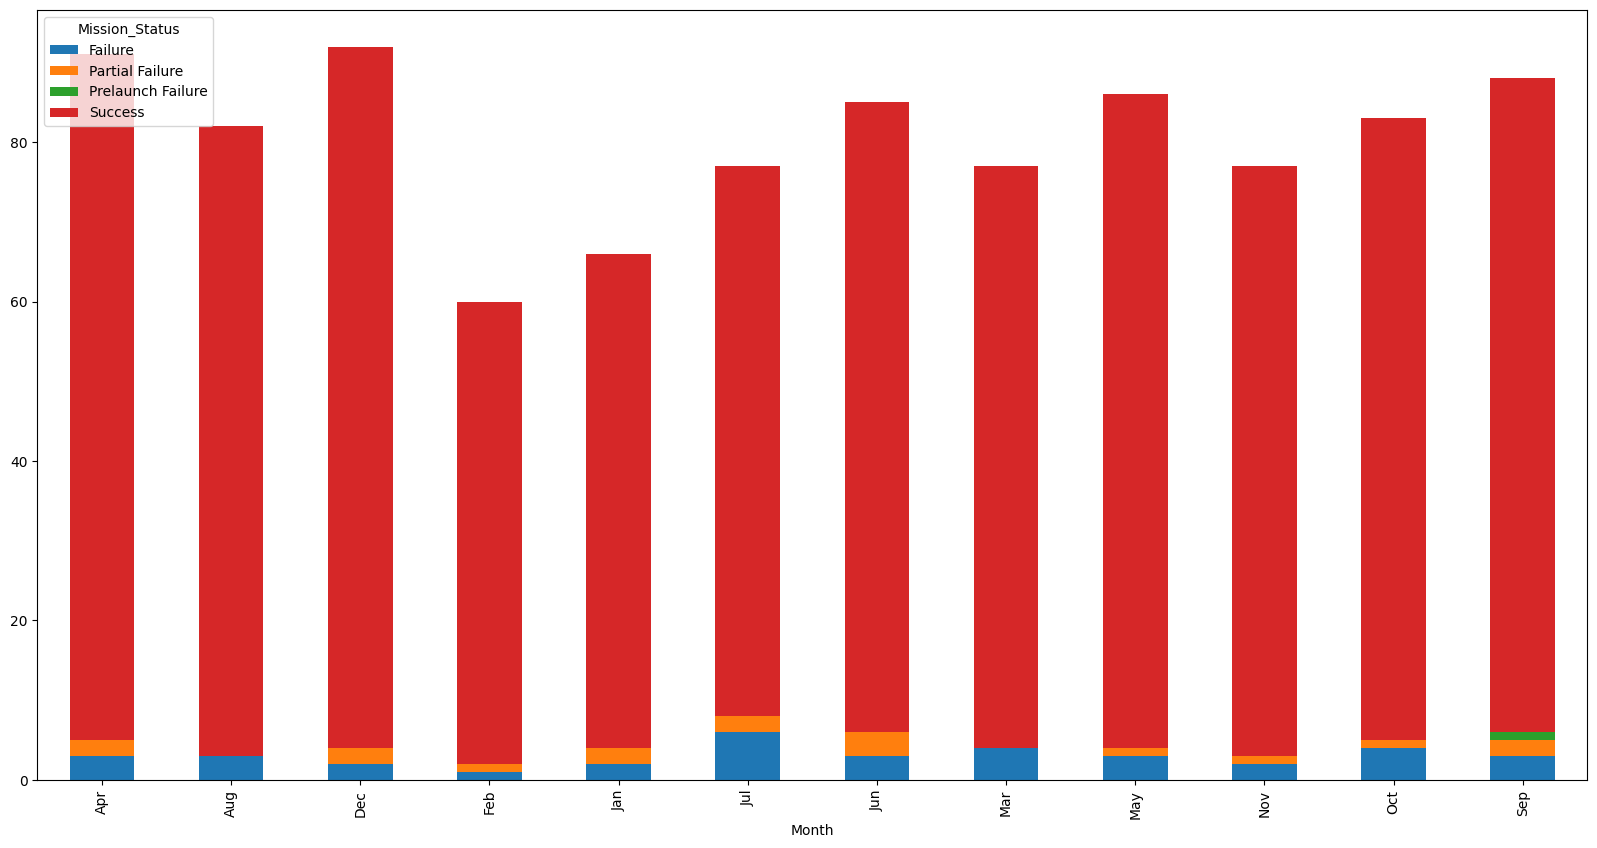

In [630]:
df.groupby('Month')['Mission_Status'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))



# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

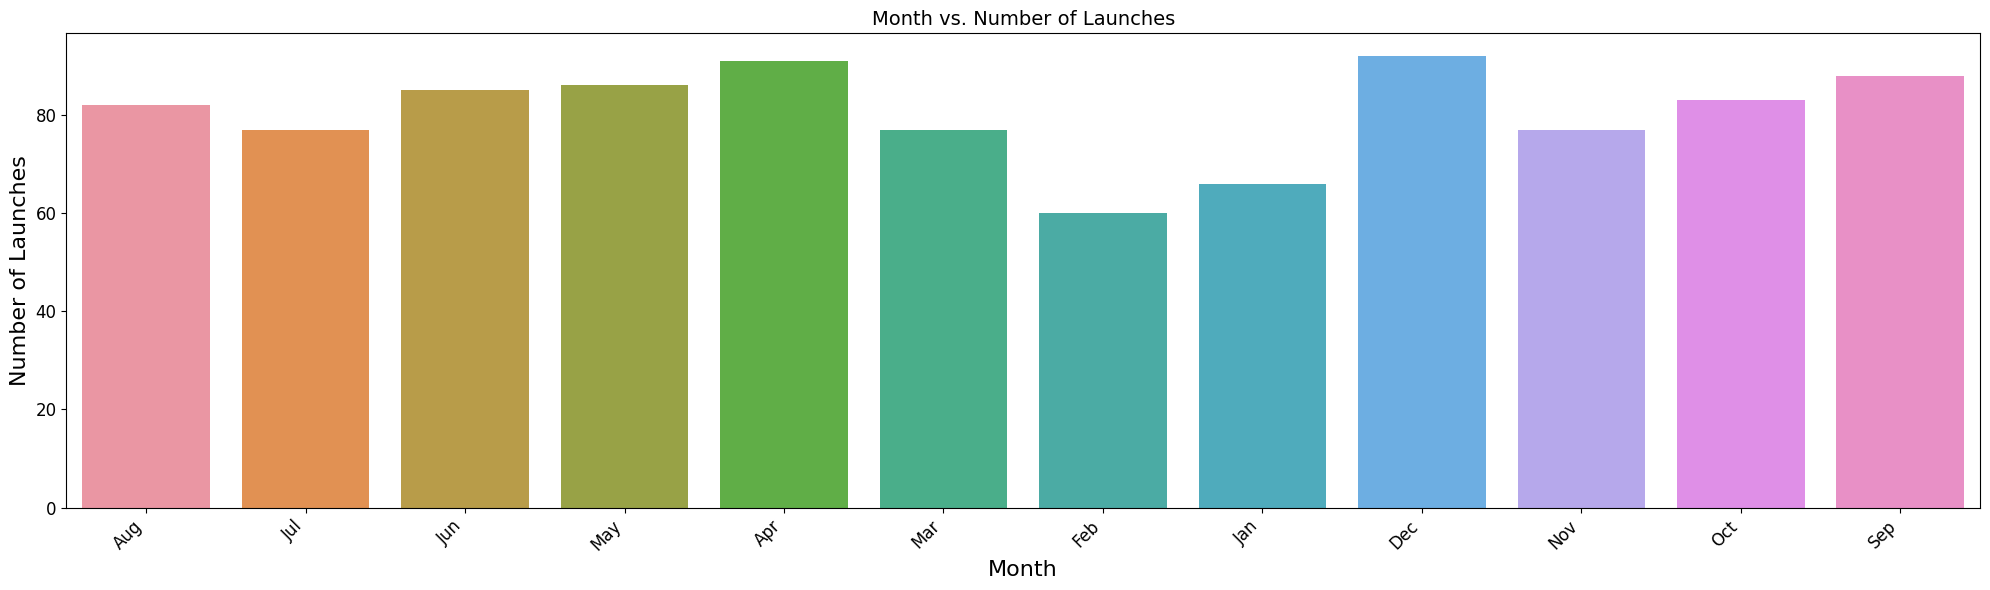

In [631]:
plt.figure(figsize=(20,6))

ax = sns.countplot(x= df['Month'])

ax.axes.set_title("Month vs. Number of Launches",fontsize=14)

ax.set_xlabel("Month", fontsize=16)

plt.xticks(rotation=45, ha='right')

ax.set_ylabel("Number of Launches",fontsize=16)

ax.tick_params(labelsize=12)

plt.tight_layout()

plt.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [632]:
avg_price_per_year = df.groupby('Year')['Price'].mean()



chart = px.line(avg_price_per_year, x=avg_price_per_year.index,

                y=avg_price_per_year.values,

                title='average price of rocket launches')



chart.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [633]:
df["Year"].min()

'1964'

In [634]:
df["Year"].max()

'2020'

In [635]:
top10_2020 = df[df.Year == '2020'].groupby('Organisation')['Mission_Status'].count().sort_values(ascending=False).reset_index().head(10)
top10_2010 = df[df.Year == '2010'].groupby('Organisation')['Mission_Status'].count().sort_values(ascending=False).reset_index().head(10)
top10_2000 = df[df.Year == '2000'].groupby('Organisation')['Mission_Status'].count().sort_values(ascending=False).reset_index().head(10)
top10_1990 = df[df.Year == '1990'].groupby('Organisation')['Mission_Status'].count().sort_values(ascending=False).reset_index().head(10)
top10_1980 = df[df.Year == '1980'].groupby('Organisation')['Mission_Status'].count().sort_values(ascending=False).reset_index().head(10)
top10_1970 = df[df.Year == '1970'].groupby('Organisation')['Mission_Status'].count().sort_values(ascending=False).reset_index().head(10)
top10_1960 = df[df.Year == '1960'].groupby('Organisation')['Mission_Status'].count().sort_values(ascending=False).reset_index().head(10)

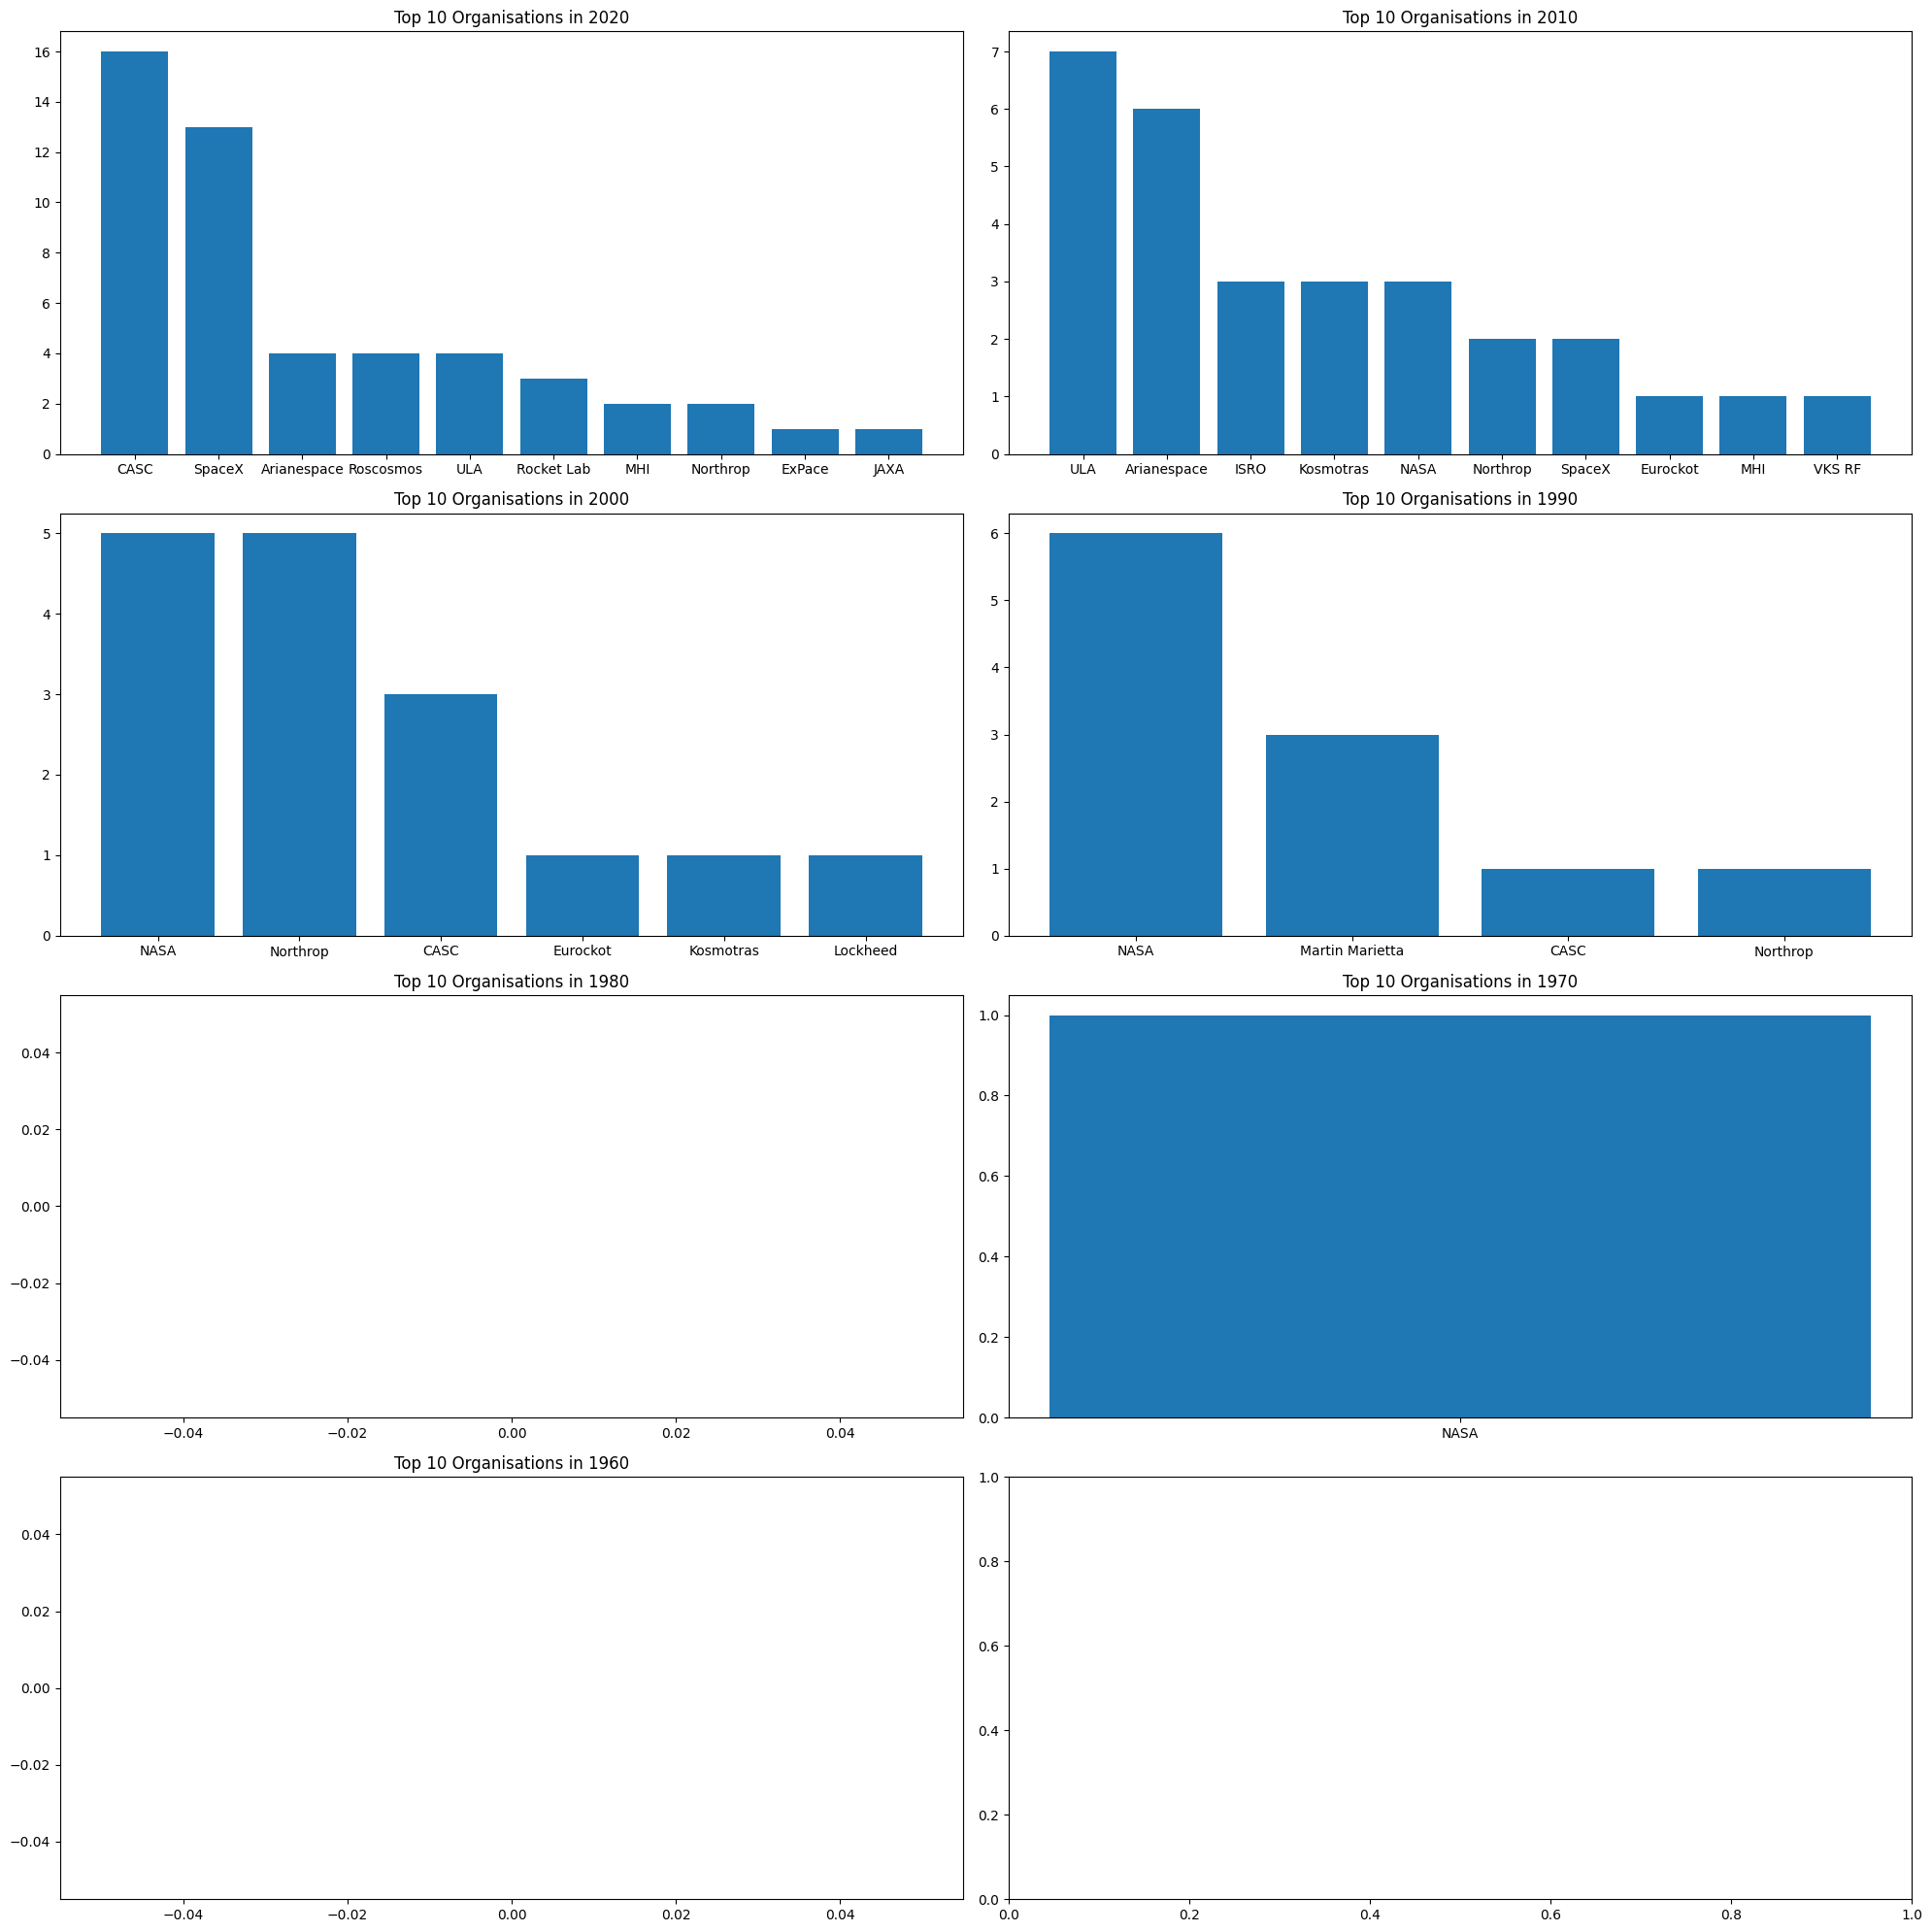

In [636]:
#plot all of them
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
ax[0, 0].bar(top10_2020.Organisation, top10_2020.Mission_Status)
ax[0, 0].set_title('Top 10 Organisations in 2020')
ax[0, 1].bar(top10_2010.Organisation, top10_2010.Mission_Status)
ax[0, 1].set_title('Top 10 Organisations in 2010')
ax[1, 0].bar(top10_2000.Organisation, top10_2000.Mission_Status)
ax[1, 0].set_title('Top 10 Organisations in 2000')
ax[1, 1].bar(top10_1990.Organisation, top10_1990.Mission_Status)
ax[1, 1].set_title('Top 10 Organisations in 1990')
ax[2, 0].bar(top10_1980.Organisation, top10_1980.Mission_Status)
ax[2, 0].set_title('Top 10 Organisations in 1980')
ax[2, 1].bar(top10_1970.Organisation, top10_1970.Mission_Status)
ax[2, 1].set_title('Top 10 Organisations in 1970')
ax[3, 0].bar(top10_1960.Organisation, top10_1960.Mission_Status)    
ax[3, 0].set_title('Top 10 Organisations in 1960')
plt.tight_layout()
plt.show()
    

    

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [637]:
cold_war = df[(df.Year >= '1945') & (df.Year <= '1991')]
cold_war

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month
1724,1724,1724,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Nov 24, 1991 23:44 UTC",Space Shuttle Atlantis | STS-44,StatusRetired,450.00,Success,USA,1991,Nov
1732,1732,1732,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Thu Sep 12, 1991 23:11 UTC",Space Shuttle Discovery | STS-48,StatusRetired,450.00,Success,USA,1991,Sep
1741,1741,1741,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 02, 1991 15:02 UTC",Space Shuttle Atlantis | STS-43,StatusRetired,450.00,Success,USA,1991,Aug
1743,1743,1743,Northrop,"NB-52B Carrier, Edwards AFB, California, USA","Sun Jul 21, 1991 17:33 UTC",Pegasus/HAPS | 7 Microsats,StatusRetired,40.00,Partial Failure,USA,1991,Jul
1750,1750,1750,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Wed Jun 05, 1991 13:24 UTC",Space Shuttle Columbia | STS-40,StatusRetired,450.00,Success,USA,1991,Jun
...,...,...,...,...,...,...,...,...,...,...,...,...
3855,3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.00,Success,USA,1966,Jul
3971,3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA,1965,May
3993,3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success,USA,1965,Feb
4000,4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA,1964,Dec


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [638]:
US_RS = df[(df["Country"]== 'USA') | (df["Country"]== 'RUS') | (df["Country"]== 'KAZ')]

grouped = US_RS.groupby(["Country"])["Mission_Status"].count()

grouped.values



pie_chart = px.pie(grouped, values=grouped.values, names=grouped.index)

pie_chart.show()



## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

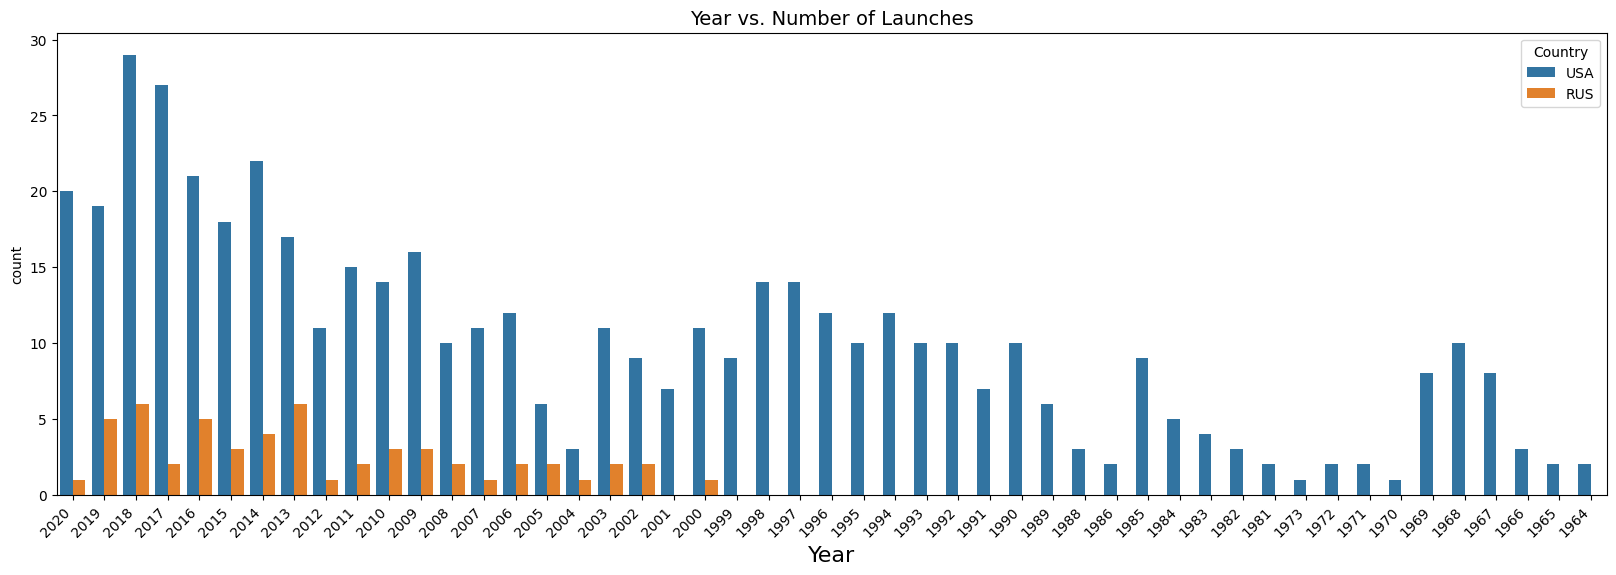

In [639]:
us_rs = df[(df["Country"]== 'USA') | (df["Country"]== 'RUS')]

plt.figure(figsize=(20,6))
ax = sns.countplot(x= us_rs['Year'], hue=us_rs['Country'])
ax.axes.set_title("Year vs. Number of Launches",fontsize=14)
ax.set_xlabel("Year", fontsize=16)
plt.xticks(rotation=45, ha='right');

## Chart the Total Number of Mission Failures Year on Year.

<AxesSubplot: title={'center': 'Number of failures per year'}, xlabel='Year'>

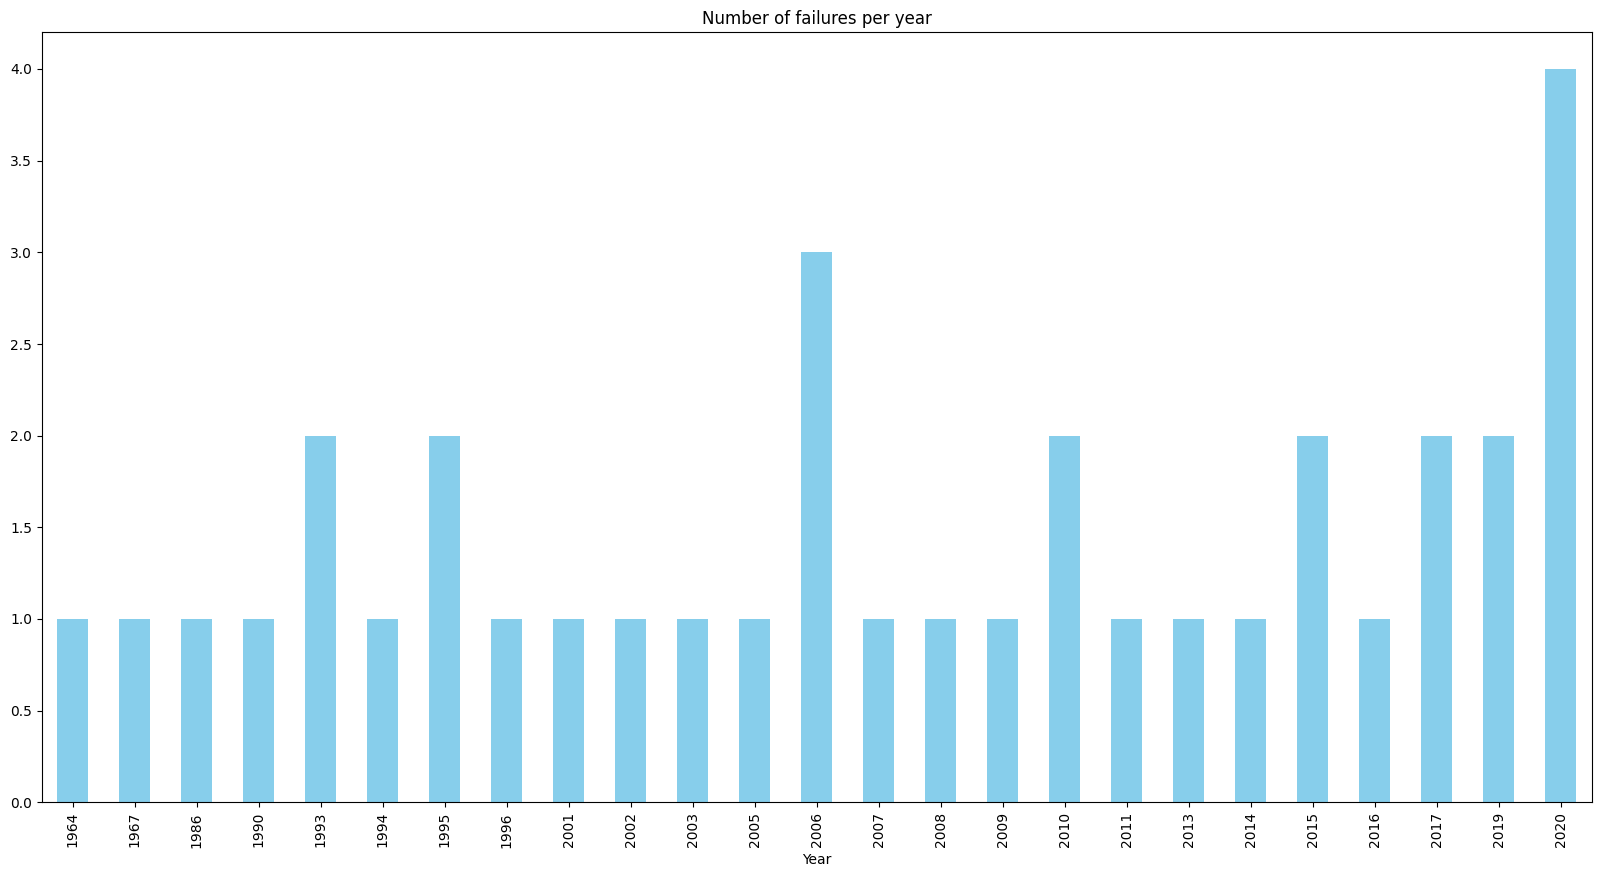

In [640]:
df["is_fail"] = df["Mission_Status"] == "Failure"
#plot only the failures
df[df.is_fail == True].groupby('Year')['Mission_Status'].count().plot(kind='bar', figsize=(20, 10), 
                                                                        title='Number of failures per year',
                                                                        color='skyblue')


In [641]:
fig = px.histogram(df, x="Year", color="Country", marginal="box", hover_data=df.columns)
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

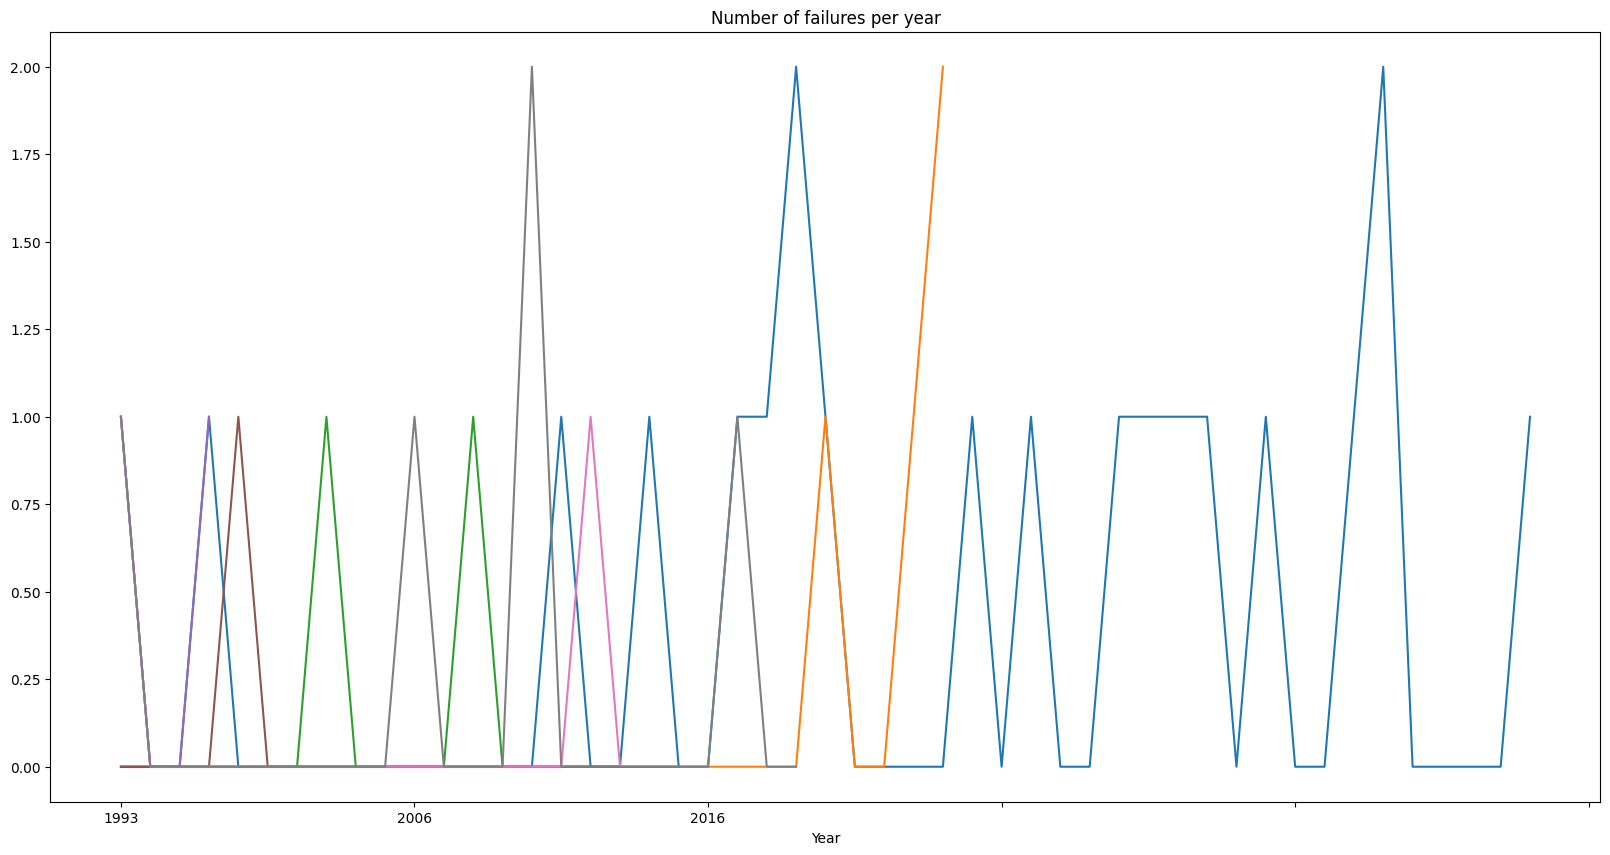

In [642]:
df["is_fail"] = df["Mission_Status"] == "Failure"
for country in df.Country.unique():
    df[df.Country == country].groupby('Year')['is_fail'].sum().plot(kind='line', figsize=(20, 10), 
                                                                        title='Number of failures per year',
                                                                        label=country)

In [651]:
is_success = df["Mission_Status"] == "Success"
country = df.groupby(["Country", "Year"]).count()
country = country.reset_index()
chart = px.line(country, x="Year", y="Mission_Status", color="Country", title="Number of launches per year")


chart.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [654]:
organisation_df = pd.DataFrame(df.groupby(["Organisation", "Year"])["Country"].count())
organisation_df = organisation_df.reset_index(level=[0,1])
organisation_df



fig = px.bar(organisation_df, x='Year', y='Country', color ='Organisation')
fig.show()

